# Machine Learning Homework 1
## Ömercan Susam - 504162517

## Question 3a

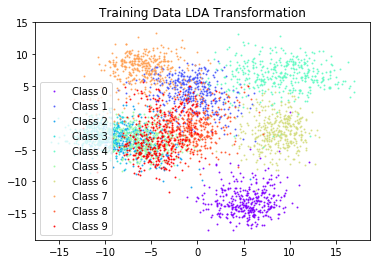

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math
from itertools import groupby
import matplotlib.cm as cm
from sklearn.feature_selection import VarianceThreshold

classNumber = 10
featureNumber = 64
trainingDataSet = np.loadtxt('./data/optdigits.tra', delimiter=',');
testDataSet = np.loadtxt('./data/optdigits.tes', delimiter=',');

trainingDataNumber = trainingDataSet.shape[0]
testDataNumber = testDataSet.shape[0]

# Find the ordering of the last column (in increasing order)
ind = np.argsort(trainingDataSet[:, 64])
# Return the matrix with rows in the specified order
trainingDataSet = trainingDataSet[ind]
trainingLabels = trainingDataSet[:, 64]
trainingData = trainingDataSet[:, 0:64]

# Find the ordering of the last column (in increasing order)
ind = np.argsort(testDataSet[:, 64])
# Return the matrix with rows in the specified order
testDataSet = testDataSet[ind]
testLabels = testDataSet[:, 64]
testData = testDataSet[:, 0:64]

# find variances
selector = VarianceThreshold()
selector.fit_transform(trainingData);
trainingDataVariances = np.array(selector.variances_)

# eliminate data with zero variances
trainingDataEliminated = trainingData[:,trainingDataVariances > 0.05];
testDataEliminated = testData[:,trainingDataVariances > 0.05];

numberOfEliminatedFeaturesTraining = trainingDataEliminated.shape[1]

meansOfClasses = np.zeros((classNumber,numberOfEliminatedFeaturesTraining));
priorProbOfClasses = np.zeros(classNumber);
covariance = np.zeros((numberOfEliminatedFeaturesTraining,numberOfEliminatedFeaturesTraining));
for x in range(0,classNumber):
    dataOfTheClass = np.array(trainingDataEliminated[(trainingLabels == x).ravel(),:]);
    meansOfClasses[x,:] = dataOfTheClass.mean(axis=0);
    priorProbOfClasses[x] = dataOfTheClass.shape[0]/trainingDataNumber;
    covariance = covariance + priorProbOfClasses[x] * np.cov(dataOfTheClass, rowvar=False);

meansOfAllClasses = meansOfClasses.mean(axis=0)

betweenClassScatter = np.zeros((numberOfEliminatedFeaturesTraining,numberOfEliminatedFeaturesTraining));
withinClassScatter = np.zeros((numberOfEliminatedFeaturesTraining,numberOfEliminatedFeaturesTraining));
meansMultiply = np.ones((numberOfEliminatedFeaturesTraining,numberOfEliminatedFeaturesTraining));
meansDifference = np.array(numberOfEliminatedFeaturesTraining)

# lda parameter calculation
for x in range(0,classNumber):
    dataOfTheClass = np.array(trainingDataEliminated[(trainingLabels == x).ravel(), :]);
    # with-in class scatter calculation
    withinClassScatter = withinClassScatter + np.cov(dataOfTheClass, rowvar=False);
    # take the difference of means of each feature in the class from total means of each feature in data set
    meansDifference = np.array(meansOfClasses[x,:] - meansOfAllClasses);
    # obtain mean * meanTranspose multiplication
    for y in range(0, numberOfEliminatedFeaturesTraining):
        meansMultiply[y,:] = meansDifference[y] * meansDifference;
    # between class scatter calculation
    betweenClassScatter = betweenClassScatter + dataOfTheClass.shape[0] * meansMultiply;

withinClassScatterInverse = np.linalg.inv(withinClassScatter);
fisher = withinClassScatterInverse.dot(betweenClassScatter);
eigenValuesVectors = np.linalg.eig(fisher)

# lda results for training set
trainingResults = np.array(trainingDataEliminated).dot(eigenValuesVectors[1][:,[0,1]].real)

# color determination for plot
rng = np.random.RandomState(0)
colors = rng.rand(10);
colors = cm.rainbow(np.linspace(0, 1, 10))

for x in range(0,classNumber):
    plt.scatter(trainingResults[trainingLabels == x, 0], trainingResults[trainingLabels == x, 1], c=colors[x], label=("Class " + str(x)), alpha=0.8, s=1);

plt.legend(loc=3,prop={'size': 10})
plt.title("Training Data LDA Transformation")
plt.show();

## Question 3b

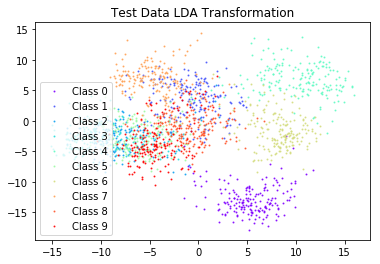

In [8]:
# lda results for test set
testResults = np.array(testDataEliminated).dot(eigenValuesVectors[1][:,[0,1]].real)

for x in range(0,classNumber):
    plt.scatter(testResults[testLabels == x, 0], testResults[testLabels == x, 1], c=colors[x], label=("Class " + str(x)), alpha=0.8, s=1
               );


plt.legend(loc=3,prop={'size': 10})
plt.title("Test Data LDA Transformation")
plt.show();

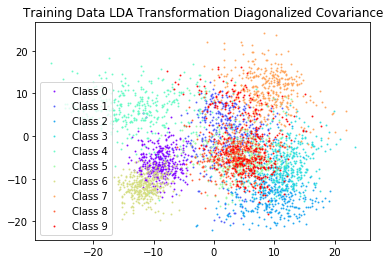

In [9]:
### Diagonlization ###
withinClassScatter2 = withinClassScatter*np.identity(numberOfEliminatedFeaturesTraining);
withinClassScatterInverse2 = np.linalg.inv(withinClassScatter2);
fisher = withinClassScatterInverse2.dot(betweenClassScatter);
eigenValuesVectors2 = np.linalg.eig(fisher)

# lda results for training set
trainingResults2 = np.array(trainingDataEliminated).dot(eigenValuesVectors2[1][:,[0,1]].real)

for x in range(0,classNumber):
    plt.scatter(trainingResults2[trainingLabels == x, 0], trainingResults2[trainingLabels == x, 1], c=colors[x], label=("Class " + str(x)), alpha=0.8, s=1);


plt.legend(loc=3,prop={'size': 10})
plt.title("Training Data LDA Transformation Diagonalized Covariance")
plt.show();

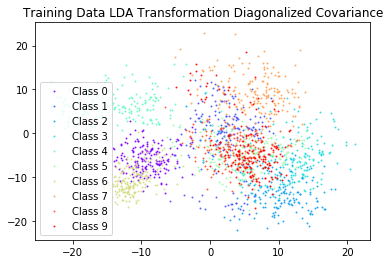

In [11]:
# lda results for training set
testResults2 = np.array(testDataEliminated).dot(eigenValuesVectors[1][:,[0,1]].real)

for x in range(0,classNumber):
    plt.scatter(testResults2[testLabels == x, 0], testResults2[testLabels == x, 1], c=colors[x], label=("Class " + str(x)), alpha=0.8, s=1);


plt.legend(loc=3,prop={'size': 10})
plt.title("Training Data LDA Transformation Diagonalized Covariance")
plt.show();